<a href="https://colab.research.google.com/github/mitaligulave/test/blob/main/mnistdigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/digit-recognizer.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_df=pd.read_csv('/content/train.csv')
test_df=pd.read_csv('/content/test.csv')

In [ ]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Extract features and labels
X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255
y_train = train_df.iloc[:, 0].values
X_test = test_df.values.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, num_classes=10)

In [ ]:
X_train.shape

(42000, 28, 28, 1)

In [ ]:
X_test.shape

(28000, 28, 28, 1)

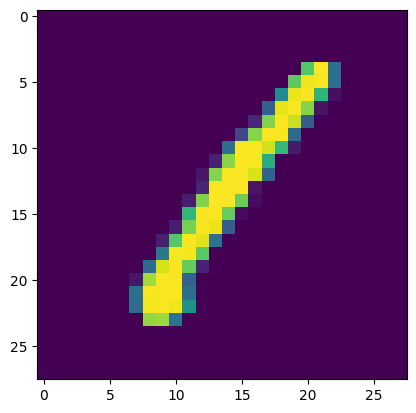

In [ ]:
plt.imshow(X_train[0])

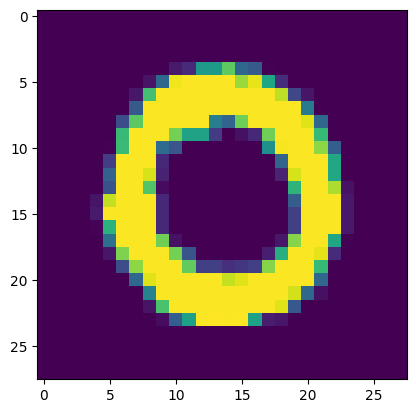

In [ ]:
plt.imshow(X_train[1])

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
datagen.fit(X_train)
val_datagen = ImageDataGenerator()
val_datagen.fit(X_val)

In [ ]:


model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduling and early stop
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=10,
    validation_data=val_datagen.flow(X_val, y_val, batch_size=64),
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ━━━━━━━━━━━━━━━━━━━━ 116s 203ms/step - accuracy: 0.5083 - loss: 1.6601 - val_accuracy: 0.8283 - val_loss: 0.5110 - learning_rate: 0.0010
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 104s 198ms/step - accuracy: 0.8962 - loss: 0.3317 - val_accuracy: 0.9808 - val_loss: 0.0612 - learning_rate: 0.0010
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 103s 196ms/step - accuracy: 0.9313 - loss: 0.2215 - val_accuracy: 0.9857 - val_loss: 0.0453 - learning_rate: 0.0010
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 107s 203ms/step - accuracy: 0.9457 - loss: 0.1759 - val_accuracy: 0.9862 - val_loss: 0.0399 - learning_rate: 0.0010
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 107s 203ms/step - accuracy: 0.9572 - loss: 0.1406 - val_accuracy: 0.9887 - val_loss: 0.0353 - learning_rate: 0.0010
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 144s 207ms/step - accuracy: 0.9615 - loss: 0.1271 - val_accuracy: 0.9882 - val_loss: 0.0351 - learning_rate: 0.0010
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 135s 193ms/step - accuracy: 0.9648 

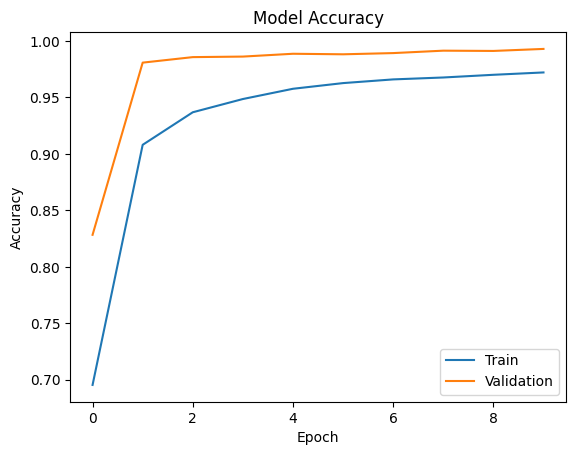

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

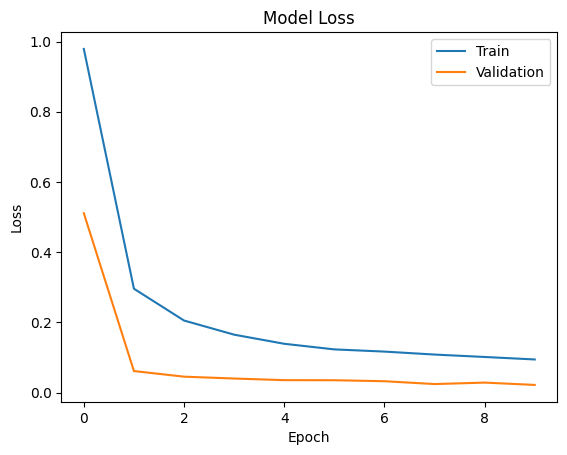

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred,axis=1)
y_pred_labels

875/875 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step


array([2, 0, 9, ..., 3, 9, 2])